2D Data Plots and Analysis
===

## Unit 7, Lecture 4

*Numerical Methods and Statistics*

----

#### Prof. Andrew White, Feburary 27th 2018

In [1]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, pi
import scipy
import scipy.stats

plt.style.use('seaborn-whitegrid')

Working with 2D data
===

Now we'll consider 2D numeric data. Recall that we're taking two measurements simultaneously so that their should be an equal number of data points for each dimension. Furthermore, they should be paired. For example, measuring people's weight and height is valid. Measuring one group of people's height and then a different group of people's weight is not valid.

Our example for this lecture will be one of the most famous datasets of all time: the Iris dataset. It's a commonly used dataset in education and describes measurements in centimeters of 150 Iris flowers. The measured data are the columns and each row is an iris flower. They are sepal length, sepal width, pedal length, pedal width, and species. We'll ignore species for our example.

Flower Anatomy
---
<img src=https://upload.wikimedia.org/wikipedia/commons/7/78/Petal-sepal.jpg style='width: 350px;'>

In [2]:
import pydataset

data = pydataset.data('iris').values
#remove species column
data = data[:,:4].astype(float)

Sample Covariance
===

Let's begin by computing sample covariance. The syntax for covariance is similar to the `std` syntax for standard deviation. We'll compute the sample covariance between petal width and sepal width.

In [3]:
np.cov(data[:,1], data[:,3], ddof=1)

array([[ 0.18997942, -0.12163937],
       [-0.12163937,  0.58100626]])

This is called a **covariance matrix**:

$$\left[\begin{array}{lr}
\sigma_{xx} & \sigma_{xy}\\
\sigma_{yx} & \sigma_{yy}\\
\end{array}\right]$$

The diagonals are the sample variances and the off-diagonal elements are the sample covariances. It is symmetric, since $\sigma_{xy} = \sigma_{yx}$. The value we observed for sample covariance is negative covariance the measurements. That means as one increases, the other decreases. The `ddof` was set to 1, meaning that the divosor for sample covariance is $N - 1$. Remember that $N$ is the number of *pairs* of $x$ and $y$ values. 

The covariance matrix can be any size. So we can explore all possible covariances simultaneously. 

In [4]:
#add rowvar = False to indicate we want cov
#over our columns and not rows
np.cov(data, rowvar=False, ddof=1)

array([[ 0.68569351, -0.042434  ,  1.27431544,  0.51627069],
       [-0.042434  ,  0.18997942, -0.32965638, -0.12163937],
       [ 1.27431544, -0.32965638,  3.11627785,  1.2956094 ],
       [ 0.51627069, -0.12163937,  1.2956094 ,  0.58100626]])

To read this larger matrix, recall the column descriptions: sepal length (0), sepal width (1), pedal length (2), pedal width (3). Then use the row and column index to identify which sample covariance is being computed. The row and column indices are interchangable because it is symmetric. For example, the sample covariance of sepal length with sepal width is $-0.042$ centimeters.

Scatter Plot
----

To get a better sense of this data, we can use a scatter plot. Let's see a high positive sample covariance and a low positive sample covariance. Sepal length and pedal length have a high positive sample covariance and sepal width with pedal width has a low positive sample covariance.

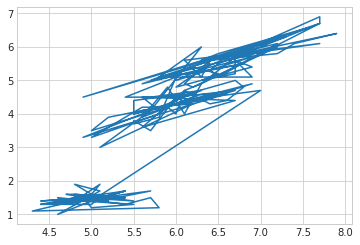

In [5]:
plt.plot(data[:,0], data[:,2])
plt.show()

What happened? It turns out, our data are not sorted according to sepal length, so the lines go from value to value. There is no reason that our data should be ordered by sepal length, so we need to use dot markers to get rid of the lines.

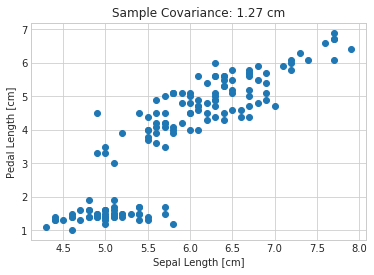

In [6]:
plt.title('Sample Covariance: 1.27 cm')
plt.plot(data[:,0], data[:,2], 'o')
plt.xlabel('Sepal Length [cm]')
plt.ylabel('Pedal Length [cm]')
plt.show()

Now the other plot

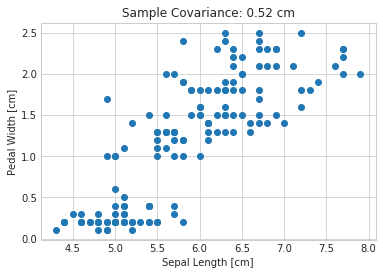

In [7]:
plt.title('Sample Covariance: 0.52 cm')
plt.plot(data[:,0], data[:,3], 'o')
plt.xlabel('Sepal Length [cm]')
plt.ylabel('Pedal Width [cm]')
plt.show()

That is suprising! The "low" sample variance plot looks like it has as much correlation as the "high" sample covariance. That's because sample variance measures both the underlying variance of both dimensions and their correlation. The reason this is a low sample covariance is that the y-values change less than in the first plot.

Sample Correlation
====

Since the covariance includes the correlation between variables and the variance of the two variables, sample correlation tries to remove the variacne so we can view only correlation.

$$r_{xy} = \frac{\sigma_{xy}}{\sigma_x \sigma_y}$$

Similar to the covariance, there is something called the **correlation matrix** or **the normalized covariance matrix**.

In [8]:
np.corrcoef(data, rowvar=False)

array([[ 1.        , -0.11756978,  0.87175378,  0.81794113],
       [-0.11756978,  1.        , -0.4284401 , -0.36612593],
       [ 0.87175378, -0.4284401 ,  1.        ,  0.96286543],
       [ 0.81794113, -0.36612593,  0.96286543,  1.        ]])

Note that we don't have to pass in `ddof` because it cancels in the correlation coefficient expression. Now we also see that the two plots from above have similar correlations as we saw visually.

Caveats of Correlation
====

Let's try creating some *synthetic* data to observe properties of correlation. I'm using the `rvs` function to sample data from distributions using `scipy.stats.`

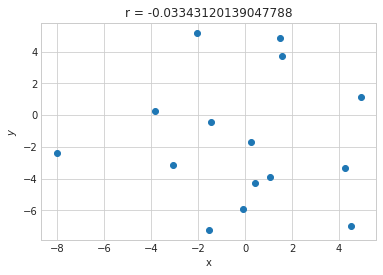

In [9]:
x = scipy.stats.norm.rvs(size=15, scale=4)
y = scipy.stats.norm.rvs(size=15, scale=4)
cor = np.corrcoef(x,y)[0,1]
plt.title('r = {}'.format(cor))
plt.plot(x, y, 'o')
plt.xlabel('x')
plt.ylabel('$y$')
plt.show()

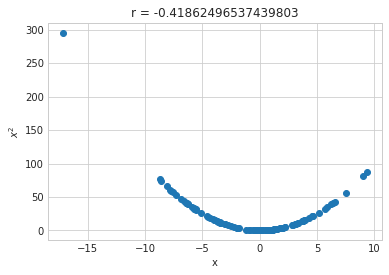

In [10]:
x = scipy.stats.norm.rvs(size=100, scale=4)
y = x ** 2
cor = np.corrcoef(x,y)[0,1]
plt.title('r = {}'.format(cor))
plt.plot(x, y, 'o')
plt.xlabel('x')
plt.ylabel('$x^2$')
plt.show()

See that $x^2$ is an analytic function of $x$, but it has a lower correlation than two independent random numbers. That's because correlation coefficients are unreliable for non-linear behavior. Another example: